# Assignment 2 - Machine Learning Basics

## *Muxin Diao*
Netid:  *mxd*

Github link: *https://github.com/ulandddda/machine-learning-course*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**<br>
**1.** Better, because a large size of observations would decrease the probability of overfitting and flexible methods would be able to fit the data with smaller MSE.<br>
<br>
**2.** Worse, because with a small size of observations, there's a high probability of overfitting using flexible methods.<br>
<br>
**3.** Better, because flexible has higher degrees of freedom and therefore could fit data with non-linear relationship better.<br>
<br>
**4.** Worse, because flexible methods would fit the noise result in overfitting.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.<br>
**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.<br>
**(c)** We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.<br>

**ANSWER**<br>
**(a)** <br>
**(i)** Regression, because the output variable is continuous.<br>
**(ii)** Inference, because we are interested in the relationship between the output variable and the predictors.<br>
**(iii)** $n = 500, p = 3$<br>
<br>
**(b)** <br>
**(i)** Classification, because the output variable is categorical.<br>
**(ii)** Prediction, because we are interested in predicting the outcome variable.<br>
**(iii)** $n = 20, p = 13$<br>
<br>
**(c)** <br>
**(i)** Regression, because the output variable is continuous.<br>
**(ii)** Prediction, because we are interested in predicting the outcome variable.<br>
**(iii)** $n = 52, p = 3$<br>

# Practical Questions

In [157]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [10]:
# (a) Write your own kNN classifier
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        training_x = []
        training_y = []
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        # Use assert method to make sure the types of x and y are pd.DataFrames
        assert isinstance(x, pd.DataFrame)
        assert isinstance(y, pd.DataFrame)
        self.training_x = x
        self.training_y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        # Use assert method to make sure the type of x is pd.DataFrames
        assert isinstance(x, pd.DataFrame)
        for row in x.values:
            # Calculate the euclidean distance of one of the new data to each vector in x
            nn_dist = np.linalg.norm(row - self.training_x.values, axis=1, keepdims=True)
            # Find the smallest k vectors in x
            nn_data = list(zip(nn_dist, self.training_y.values))
            nn_data_sort = sorted(nn_data,key=lambda x: x[0])
            # Determine the binary label
            label_sum = sum([y for _, y in nn_data_sort[:k]])
            if label_sum > k/2.0:
                y_hat.append(1)
            else:
                y_hat.append(0)
            
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [2]:
# (b) Load the datasets to be evaluated
import time as t
A2_X_train_low = pd.read_csv('data/A2_X_train_low.csv',header=None)
A2_X_test_low = pd.read_csv('data/A2_X_test_low.csv',header=None)
A2_Y_train_low = pd.read_csv('data/A2_Y_train_low.csv',header=None)
A2_Y_test_low = pd.read_csv('data/A2_Y_test_low.csv',header=None)

A2_X_train_high = pd.read_csv('data/A2_X_train_high.csv',header=None)
A2_X_test_high = pd.read_csv('data/A2_X_test_high.csv',header=None)
A2_Y_train_high = pd.read_csv('data/A2_Y_train_high.csv',header=None)
A2_Y_test_high = pd.read_csv('data/A2_Y_test_high.csv',header=None)

In [3]:
# (c) Evaluate the performance of your kNN classifier on a low-dimensional dataset and time the predictions of each
knn_low = Knn()
knn_low.fit(A2_X_train_low, A2_Y_train_low)
start = t.time()
predicted_Y_low = knn_low.predict(A2_X_test_low, 5)
end = t.time()
print('accuracy %f, time elapsed %fs' % (accuracy(A2_Y_test_low.values.flatten(), predicted_Y_low), end-start))

accuracy 0.925000, time elapsed 5.765624s


In [4]:
# Evaluate the performance of your kNN classifier on a high-dimensional dataset and time the predictions of each
knn_high = Knn()
knn_high.fit(A2_X_train_high, A2_Y_train_high)
start = t.time()
predicted_Y_high = knn_high.predict(A2_X_test_high, 5)
end = t.time()
print('accuracy %f, time elapsed %fs' % (accuracy(A2_Y_test_high.values.flatten(), predicted_Y_high), end-start))

accuracy 0.993000, time elapsed 6.869653s


In [47]:
# (d) Compare accuracy and computation time to the scikit learn KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier
sklearn_knn= KNeighborsClassifier(n_neighbors = 5)
sklearn_knn.fit(A2_X_train_low, np.ravel(A2_Y_train_low.values))
start = t.time()
sklearn_pred = sklearn_knn.predict(A2_X_test_low)
end = t.time()
print('accuracy %f, time elapsed %fs' % (accuracy(A2_Y_test_low.values.flatten(), sklearn_pred), end-start))

sklearn_knn.fit(A2_X_train_high, np.ravel(A2_Y_train_high.values))
start = t.time()
sklearn_pred = sklearn_knn.predict(A2_X_test_high)
end = t.time()
print('accuracy %f, time elapsed %fs' % (accuracy(A2_Y_test_high.values.flatten(), sklearn_pred), end-start))

accuracy 0.925000, time elapsed 0.003988s
accuracy 0.993000, time elapsed 0.271276s


The accuracies of my implementation and sklearn method are exactly same. However, the speed of sklearn method is on average $29.65$ times of my implementation.

**(e)** The drawbacks of the prediction process being slow are: 
1. Low effeciency and high time cost when dealing with a large volume of data.
2. High requirements on the hardware of the processing machine.
3. More time-consuming and difficult to test and debug the code.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [31]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [45]:
# (a) Compute the Euclidean distance and show the table
X_test = np.array([0, 0, 0])
dist_table = pd.DataFrame(np.linalg.norm(X_test - X, axis = 1, keepdims = True), columns = ['Distance'])
dist_table.index += 1
dist_table.index.name = 'Obs.'
dist_table

,Distance
Obs.,
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


In [55]:
# (b) Prediction with  K = 1
knn_color = KNeighborsClassifier(n_neighbors = 1)
knn_color.fit(X, y)
color_pred = knn_color.predict(X_test.reshape(1, -1))
print('The prediction when K = 1 is %s.'% color_pred[0])
# The predicted value is 'Blue'.

The prediction when K = 1 is b.


In [58]:
# (c) Prediction with  K = 5
knn_color = KNeighborsClassifier(n_neighbors = 5)
knn_color.fit(X, y)
color_pred = knn_color.predict(X_test.reshape(1, -1))
print('The prediction when K = 5 is %s.'% color_pred[0])
# The predicted value is 'Red'.

The prediction when K = 5 is r.


**(d)**
If the Bayes decision boundary is highly nonlinear, then would we expect the best value of K to be small because we need more flexible method to fit non-linear relationships.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [61]:
# (a) Create a synthetic dataset
from sklearn.datasets import make_moons
rand_x, rand_y = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.35, random_state=None)

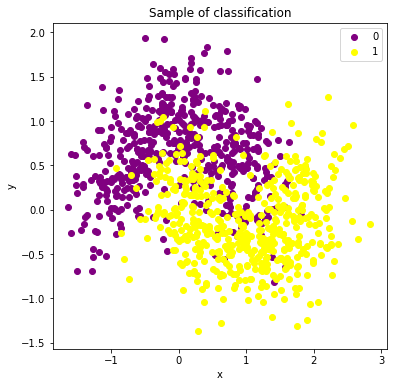

In [134]:
# (b) Scatterplot the samples
colors = ['purple','yellow']
fig = plt.figure(figsize=(6,6))
plt.scatter(rand_x[rand_y==0, 0], rand_x[rand_y==0, 1], c = colors[0], label = '0')
plt.scatter(rand_x[rand_y==1, 0], rand_x[rand_y==1, 1], c = colors[1], label = '1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Sample of classification')
plt.show()

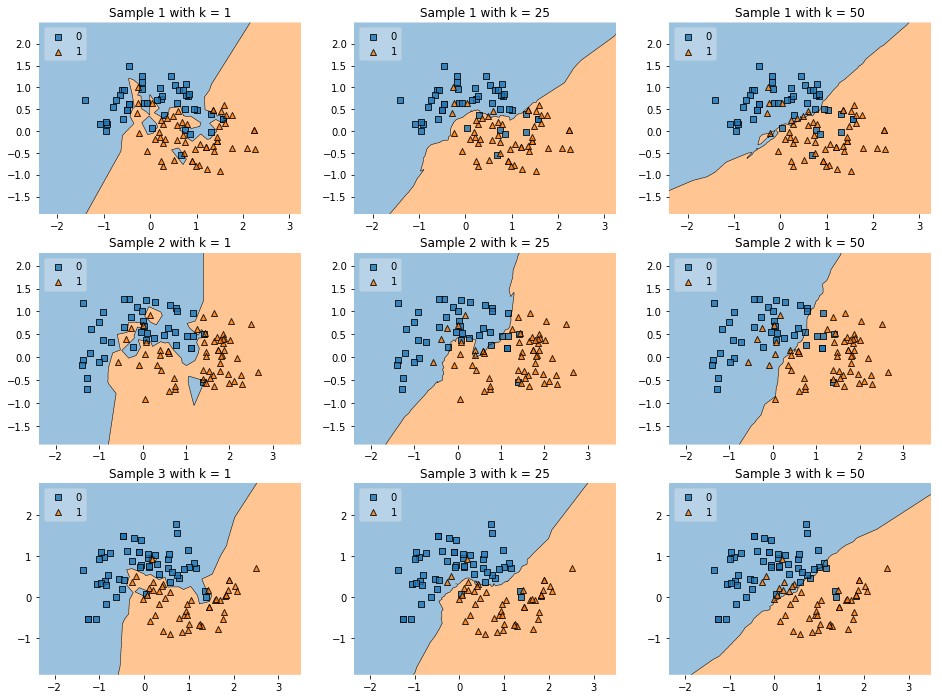

In [117]:
# (c) Draw 3 random samples of size 100 and fit knn classifiers respectively
# (d) Plot the boundary of each classifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
rand_index = np.random.randint(0, 1000, (3, 100))
k = [1, 25, 50]
fig, axes = plt.subplots(3, 3, figsize = (16, 12))
for i, sample in enumerate(rand_index):
    for j, n in enumerate(k):
        knn = KNeighborsClassifier(n_neighbors = n)
        knn.fit(rand_x[sample, ], rand_y[sample])
        plot_decision_regions(rand_x[sample, ], rand_y[sample], clf = knn, legend = 2, ax = axes[i,j])
        axes[i,j].set_title('Sample %i with k = %i'%(i + 1, k[j]))

**(e)** 
The difference between rows is undistinguishable. This is because we drew 3 random samples of the same size and fit the exact same classifiers and thus their performance are similar. <br>
The difference between columns is that as k grows bigger, the boundary of the classifier grows smoother and closer to linear. This is because as k increases, the flexibility of the model decreases and the degree of freedom decreases.<br>
The first column (k = 1) varies the most when data changes. This is because models with k = 1 are most flexible and volatile to changes of training data.

**(f)** 
In the 3 columns above, as k grows from 1 to 50, the flexibility of the classifier decreases and the boundary of the classifier grows smoother and closer to linear, which means the boundary becomes less sensitive to the training data, thus made the variance lower. However, compared to non-linear boundaries, linear boundaries are more numb in classification since the method is quite simple, we are sacrificing low-bias when using them.<br>
To sum up, the 3 columns from left to right shows an decrease in flexibility, which results in a lower variance and higher bias - this is the bias-variance tradeoff.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [118]:
# (a) Create training dataset.
train_x, train_y = rand_x, rand_y
test_x, test_y = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.35, random_state=None)

In [133]:
# (b) Fit kNN classifier with k = 1,2,...500. Plot the classification error.
accuracy_list = []
for i in range(1, 501):
    knn_k = KNeighborsClassifier(n_neighbors = i)
    knn_k.fit(train_x, train_y)
    accuracy_list.append(accuracy(test_y, knn_k.predict(test_x)))

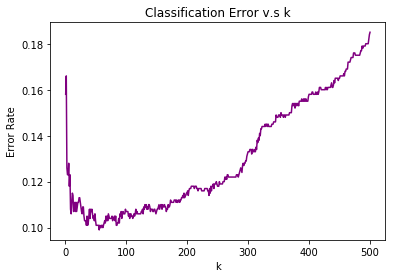

In [139]:
plt.plot(range(1, 501), np.repeat(1, 500) - accuracy_list, c = 'purple')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Classification Error v.s k')
plt.show()

**(c)** 
I could see a sharp drop of error rate when k is approximately in range of (1, 10) followed by a slow decrease approximately in the range of (11, 60). From k around 60, the error rate gradually increases as k goes up. The minimum error rate is around 0.10.

**(d)** 
$k = 500$(big values) represents high bias and $k = 1$(small values) represents high variance.

In [153]:
# (e) Determine the optimal k
ind = accuracy_list.index(max(accuracy_list))+1
min_error = (1 - max(accuracy_list))
print('The optimal k is %i.'%ind)
print('Becuase it has the minimum error rate of {:.4f}.'.format(min_error))

The optimal k is 56.
Becuase it has the minimum error rate of 0.0990.


**(f)** 
For neural network, the number of layers and the number of neurons in each layer control the flexibility.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [155]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

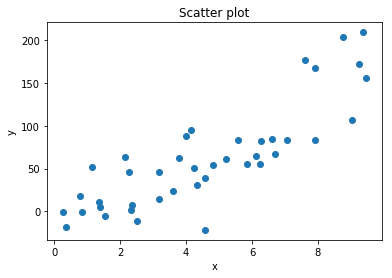

In [167]:
# (a)
plt.scatter(x_train, y_train)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [164]:
# (b)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg_model = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
print('The regression formula is: y = %f + %f * x' % (reg_model.intercept_, reg_model.coef_))
print('The R-squared of the regression in train set is: %f' % reg_model.score(np.array(x_train).reshape(-1,1), y_train))
print('The MSE of the regression in train set is: %f' % mean_squared_error(reg_model.predict(np.array(x_train).reshape(-1,1)), y_train))

The regression formula is: y = -21.730783 + 18.303207 * x
The R-squared of the regression in train set is: 0.701459
The MSE of the regression in train set is: 1052.585366


**(c)**<br>
I choose to add the quadratic transformation of x.

In [175]:
x_train_trans = np.hstack((np.array(x_train).reshape(-1,1), np.square(x_train).reshape(-1,1)))
x_test_trans = np.hstack((np.array(x_test).reshape(-1,1), np.square(x_test).reshape(-1,1)))
reg_model_trans = LinearRegression().fit(x_train_trans, y_train)
print('The regression formula is: y = %f + %f * x + %f * x^2' % (reg_model_trans.intercept_, reg_model_trans.coef_[0], reg_model_trans.coef_[1]))
print('The R-squared of the regression in train set is: %f' % reg_model_trans.score(x_train_trans, y_train))
print('The MSE of the regression in train set is: %f' % mean_squared_error(reg_model_trans.predict(x_train_trans), y_train))

The regression formula is: y = 8.007337 + 0.471007 * x + 1.832082 * x^2
The R-squared of the regression in train set is: 0.749048
The MSE of the regression in train set is: 884.797760


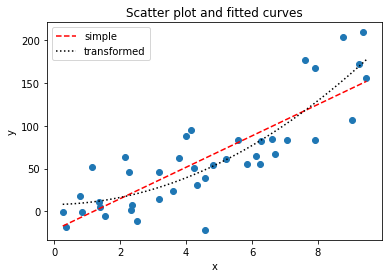

In [178]:
# (d)
plt.scatter(x_train, y_train)
plt.title('Scatter plot and fitted curves')
x_mesh = np.linspace(min(x_train),max(x_train),200)
y_linear = reg_model.intercept_+reg_model.coef_[0]*x_mesh
y_quadratic = reg_model_trans.intercept_+reg_model_trans.coef_[0]*x_mesh+reg_model_trans.coef_[1]*x_mesh**2
plt.plot(x_mesh,y_linear,'r--',label='simple')
plt.plot(x_mesh,y_quadratic,'k:',label='transformed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [181]:
# (e)
print('The R-squared of the simple regression in test set is: %f' % reg_model.score(np.array(x_test).reshape(-1,1), y_test))
print('The MSE of the simple regression in test set is: %f' % mean_squared_error(reg_model.predict(np.array(x_test).reshape(-1,1)), y_test))
print('The R-squared of the transformed regression in test set is: %f' % reg_model_trans.score(x_test_trans, y_test))
print('The MSE of the transformed regression in test set is: %f' % mean_squared_error(reg_model_trans.predict(x_test_trans), y_test))

The R-squared of the simple regression in test set is: 0.555647
The MSE of the simple regression in test set is: 2023.312109
The R-squared of the transformed regression in test set is: 0.692782
The MSE of the transformed regression in test set is: 1398.881758


**(f)**<br>
For both train and test data, the transformed regression performs better w.r.t. both R-squared measure and MSE measure. Because there is curvature pattern in the scatter plot and adding the quadratic term captures this, thus increasing the variance explained and predictive power.

**(g)**<br>
The predictive power will be decreased, and decreased much larger for transformed model. Because transformed model has higher flexibility than simple regression model, it is more sensitive to the change of data pattern and more prone to overfitting when test data has a different pattern from train data.